Step 1: Data Preperation

Step 2: Applying LDA
Original data shape: (150, 4)
Transformed data shape: (150, 2)
Explained variance ratio: [0.9912126 0.0087874]

Step 3: Appyling PCA for comparisons
Original data shape: (150, 4)
Transformed data shape: (150, 2)
Explained variance ratio: [0.72962445 0.22850762]

Step 4: Visualizing the results


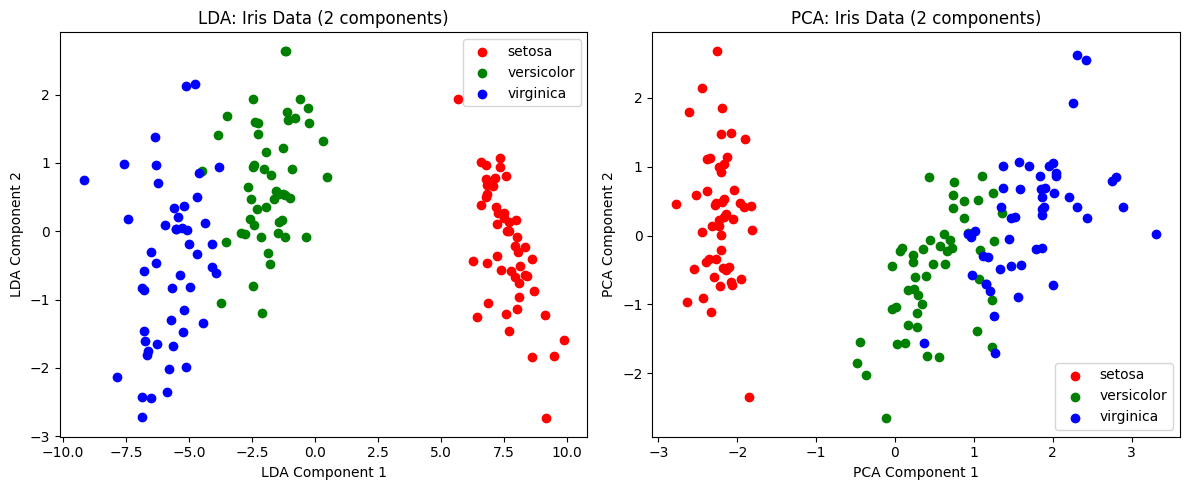


Step 5: Analysis of Results
LDA vs PCA Comparison:
- LDA maximizes class separability
- PCA maximizes variance explained

Interclass distances:
LDA: 9.4797
PCA: 2.8476


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

print("Step 1: Data Preperation")
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)


print("\nStep 2: Applying LDA")
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_std, y)
print("Original data shape:", X.shape)
print("Transformed data shape:", X_lda.shape)
print("Explained variance ratio:", lda.explained_variance_ratio_)

print("\nStep 3: Appyling PCA for comparisons")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
print("Original data shape:", X.shape)
print("Transformed data shape:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)


print("\nStep 4: Visualizing the results")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for label, color in zip(np.unique(y), ['r', 'g', 'b']):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=iris.target_names[label], color=color)
plt.title('LDA: Iris Data (2 components)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.subplot(1, 2, 2)
for label, color in zip(np.unique(y), ['r', 'g', 'b']):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=iris.target_names[label], color=color)
plt.title('PCA: Iris Data (2 components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.tight_layout()
plt.show()

print("\nStep 5: Analysis of Results")
print("LDA vs PCA Comparison:")
print("- LDA maximizes class separability")
print("- PCA maximizes variance explained")

    # Calculate class separation metrics
class_means_lda = [np.mean(X_lda[y == i], axis=0)
                      for i in range(3)]
class_means_pca = [np.mean(X_pca[y == i], axis=0)
                      for i in range(3)]

print("\nInterclass distances:")
print("LDA:", np.linalg.norm(class_means_lda[0] - class_means_lda[1]).round(4))
print("PCA:", np.linalg.norm(class_means_pca[0] - class_means_pca[1]).round(4))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')